In [80]:
import numpy as np
import pandas as pd
import seaborn as sns 
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [81]:
#Importing dataset to train model 

csv_file_path = 'C:/Users/ETTORE/Documents/Iron Hack/week 6/newdf_data.csv'

df1 = pd.read_csv(csv_file_path)

In [82]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.511,0.970,10,-3.720,1,0.0414,0.000006,0.001360,0.1800,0.566,132.986,audio_features,2R6UrJ8uWbSIiHWmvRQvN8,spotify:track:2R6UrJ8uWbSIiHWmvRQvN8,https://api.spotify.com/v1/tracks/2R6UrJ8uWbSI...,https://api.spotify.com/v1/audio-analysis/2R6U...,304693,4
1,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,audio_features,5sICkBXVmaCQk5aISGR3x1,spotify:track:5sICkBXVmaCQk5aISGR3x1,https://api.spotify.com/v1/tracks/5sICkBXVmaCQ...,https://api.spotify.com/v1/audio-analysis/5sIC...,331267,4
2,0.543,0.836,4,-9.110,0,0.0353,0.000647,0.431000,0.1530,0.560,105.173,audio_features,2MuWTIM3b0YEAskbeeFE1i,spotify:track:2MuWTIM3b0YEAskbeeFE1i,https://api.spotify.com/v1/tracks/2MuWTIM3b0YE...,https://api.spotify.com/v1/audio-analysis/2MuW...,515387,4
3,0.553,0.362,4,-11.218,0,0.0263,0.045800,0.000006,0.0750,0.158,142.352,audio_features,0nLiqZ6A27jJri2VCalIUs,spotify:track:0nLiqZ6A27jJri2VCalIUs,https://api.spotify.com/v1/tracks/0nLiqZ6A27jJ...,https://api.spotify.com/v1/audio-analysis/0nLi...,388267,3
4,0.540,0.584,7,-9.579,1,0.0254,0.010800,0.002960,0.2530,0.244,139.261,audio_features,4aYLAF6ckQ5ooGGGM7sWAa,spotify:track:4aYLAF6ckQ5ooGGGM7sWAa,https://api.spotify.com/v1/tracks/4aYLAF6ckQ5o...,https://api.spotify.com/v1/audio-analysis/4aYL...,386493,4


In [83]:
df = df1.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "duration_ms"])

In [84]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.511,0.970,10,-3.720,1,0.0414,0.000006,0.001360,0.1800,0.566,132.986,4
1,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,4
2,0.543,0.836,4,-9.110,0,0.0353,0.000647,0.431000,0.1530,0.560,105.173,4
3,0.553,0.362,4,-11.218,0,0.0263,0.045800,0.000006,0.0750,0.158,142.352,3
4,0.540,0.584,7,-9.579,1,0.0254,0.010800,0.002960,0.2530,0.244,139.261,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0.655,0.876,11,-5.929,0,0.0325,0.000170,0.014100,0.0476,0.673,122.862,4
1559,0.775,0.606,0,-9.860,1,0.1200,0.042000,0.000000,0.5230,0.788,103.648,4
1560,0.621,0.729,2,-11.710,0,0.0306,0.005080,0.000834,0.3350,0.467,134.966,4
1561,0.815,0.587,6,-10.161,0,0.2370,0.001790,0.019300,0.6450,0.754,111.762,4


In [85]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
#display(df.head())
print()
display(df_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.760228,1.291194,1.357017,0.666891,0.872995,-0.632714,-0.759651,-0.472193,-0.056082,0.139518,0.482358,0.132383
1,-0.392886,0.705595,0.257332,-0.020859,-1.145483,-0.745202,-0.752295,-0.438723,-0.862046,0.292271,0.139293,0.132383
2,-0.582123,0.738586,-0.292511,-0.078828,-1.145483,-0.691867,-0.757430,0.960074,-0.234597,0.115399,-0.498387,0.132383
3,-0.526465,-1.216160,-0.292511,-0.370475,-1.145483,-0.779143,-0.601082,-0.476706,-0.750308,-1.500565,0.812623,-2.520376
4,-0.598820,-0.300646,0.532253,-0.143716,0.872995,-0.787870,-0.722274,-0.466859,0.426570,-1.154861,0.703627,0.132383


In [86]:
df_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.563000e+03,1563.000000,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03,1.563000e+03
mean,-1.818408e-17,0.000000,1.250155e-17,1.454726e-16,3.636815e-17,-3.636815e-17,-7.273630e-17,-7.273630e-17,4.546019e-17,-9.092038e-18,2.227549e-16,1.636567e-16
std,1.000320e+00,1.000320,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00
min,-3.604342e+00,-2.704489,-1.392196e+00,-5.011227e+00,-1.145483e+00,-1.034181e+00,-7.596545e-01,-4.767265e-01,-1.100066e+00,-2.135695e+00,-4.207007e+00,-1.047865e+01
25%,-5.542942e-01,-0.449108,-8.423533e-01,-2.957491e-02,-1.145483e+00,-6.356231e-01,-6.926687e-01,-4.767265e-01,-6.375792e-01,-7.307713e-01,-7.476369e-01,1.323834e-01
50%,1.692574e-01,0.185979,-1.758934e-02,2.889121e-01,8.729946e-01,-4.436171e-01,-4.532275e-01,-4.766535e-01,-4.065010e-01,3.902251e-02,2.409163e-02,1.323834e-01
75%,6.924409e-01,0.726214,8.071746e-01,5.027356e-01,8.729946e-01,2.167672e-01,2.843136e-01,-3.902185e-01,4.166529e-01,7.947470e-01,6.919204e-01,1.323834e-01
max,1.800031e+00,1.402540,1.631939e+00,1.291136e+00,8.729946e-01,7.800035e+00,2.689113e+00,2.796911e+00,5.213426e+00,1.783620e+00,2.930323e+00,2.785143e+00


In [87]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(df_scaled_df)

C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1234)

In [88]:
labels = kmeans.labels_
labels

array([0, 2, 2, ..., 2, 3, 2])

In [89]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [90]:
clusters = kmeans.predict(df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    266
1     53
2    474
3     96
4    176
5    297
6    123
7     78
Name: count, dtype: int64

In [91]:
clusters

array([0, 2, 2, ..., 2, 3, 2])

In [92]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,0.511,0.970,10,-3.720,1,0.0414,0.000006,0.001360,0.1800,0.566,132.986,4,0
1,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,4,2
2,0.543,0.836,4,-9.110,0,0.0353,0.000647,0.431000,0.1530,0.560,105.173,4,2
3,0.553,0.362,4,-11.218,0,0.0263,0.045800,0.000006,0.0750,0.158,142.352,3,2
4,0.540,0.584,7,-9.579,1,0.0254,0.010800,0.002960,0.2530,0.244,139.261,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0.655,0.876,11,-5.929,0,0.0325,0.000170,0.014100,0.0476,0.673,122.862,4,2
1559,0.775,0.606,0,-9.860,1,0.1200,0.042000,0.000000,0.5230,0.788,103.648,4,3
1560,0.621,0.729,2,-11.710,0,0.0306,0.005080,0.000834,0.3350,0.467,134.966,4,2
1561,0.815,0.587,6,-10.161,0,0.2370,0.001790,0.019300,0.6450,0.754,111.762,4,3


In [93]:
df[df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
177,0.466,0.965,1,-2.597,0,0.0904,0.042,0.0,0.101,0.453,95.028,3,2


In [94]:
kmeans.inertia_

9070.272129648518

In [95]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

9136.697947875058


### Choosing K

Training a K-Means model with 2 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

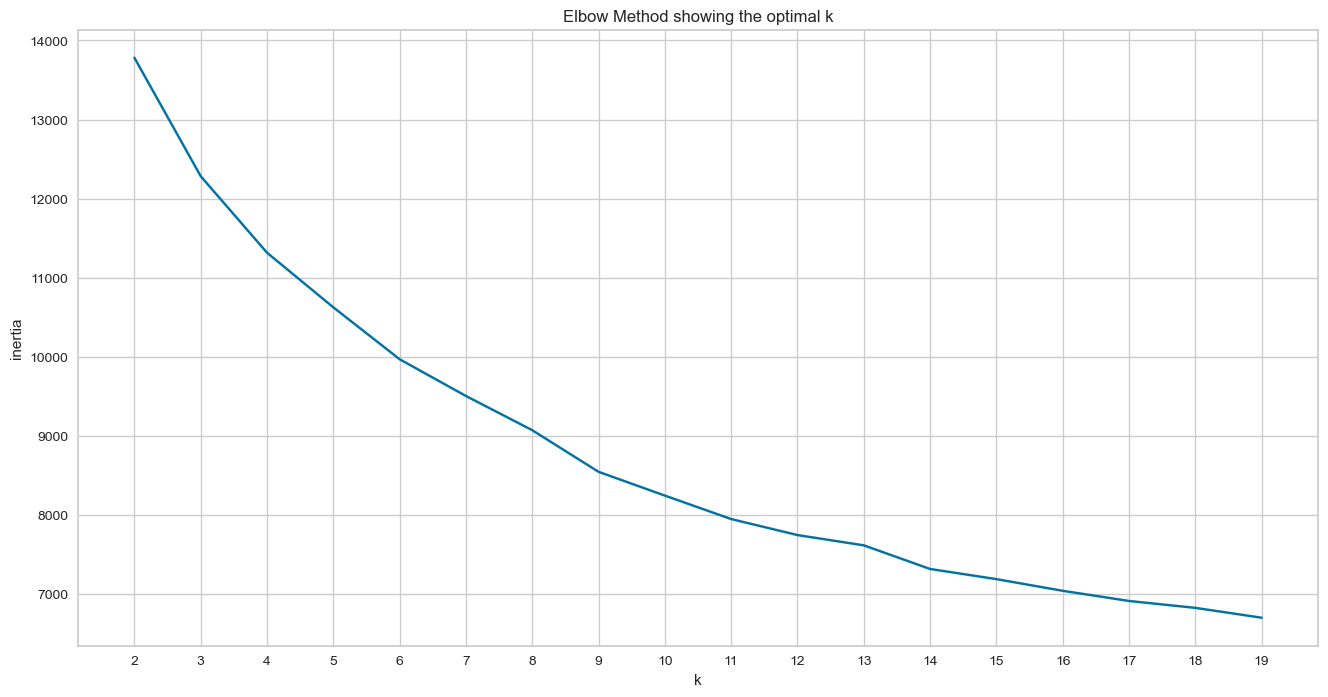

In [96]:
K = range(2, 20)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

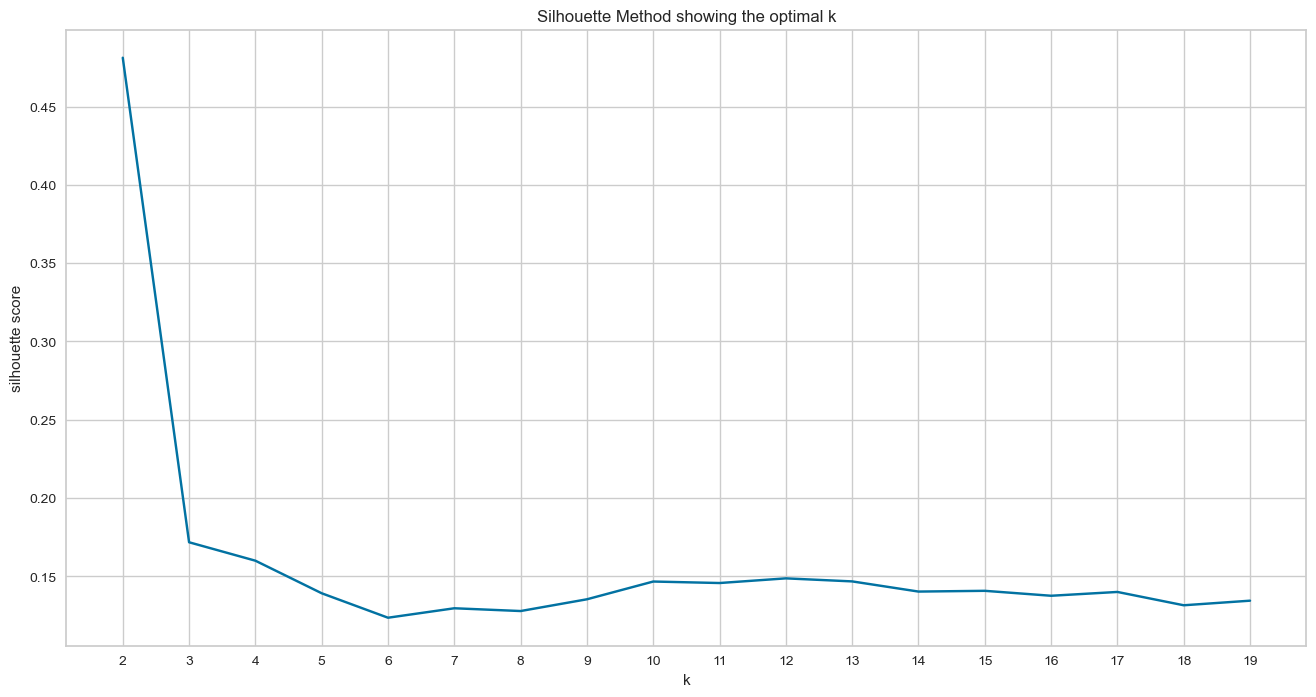

In [97]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(df_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


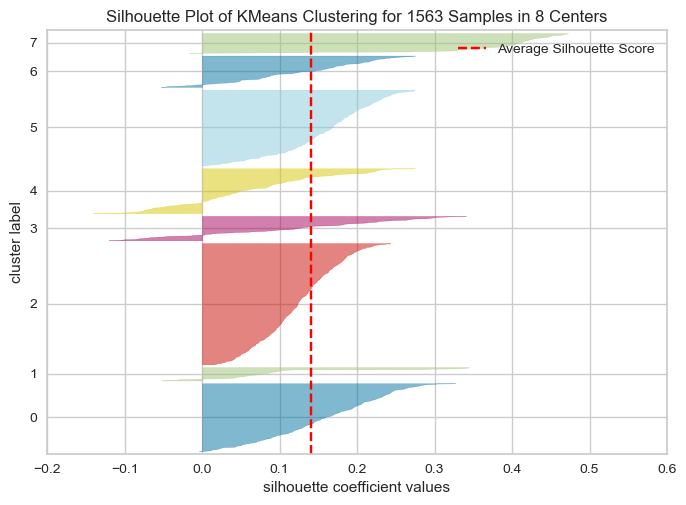

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1563 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(8, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Saving with pickle

In [99]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(df_scaled_df)

C:\Users\ETTORE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1234)

In [100]:
def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
    	pickle.dump(model, f)

In [101]:
save(kmeans, "spot_model.pickle")

In [102]:
def load(spot_model = "spot_model.pickle"): 
    try: 
        with open(spot_model, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [103]:
save(scaler, "scaler_spot.pickle")

In [104]:
kmeans_model = load(spot_model="kmeans_8.pickle")

In [105]:
kmeans_model

KMeans(n_init='auto', random_state=1234)

In [106]:
df1["cluster"] = kmeans_model.labels_

In [107]:
df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.511,0.970,10,-3.720,1,0.0414,0.000006,0.001360,0.1800,0.566,132.986,audio_features,2R6UrJ8uWbSIiHWmvRQvN8,spotify:track:2R6UrJ8uWbSIiHWmvRQvN8,https://api.spotify.com/v1/tracks/2R6UrJ8uWbSI...,https://api.spotify.com/v1/audio-analysis/2R6U...,304693,4,6
1,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,audio_features,5sICkBXVmaCQk5aISGR3x1,spotify:track:5sICkBXVmaCQk5aISGR3x1,https://api.spotify.com/v1/tracks/5sICkBXVmaCQ...,https://api.spotify.com/v1/audio-analysis/5sIC...,331267,4,3
2,0.543,0.836,4,-9.110,0,0.0353,0.000647,0.431000,0.1530,0.560,105.173,audio_features,2MuWTIM3b0YEAskbeeFE1i,spotify:track:2MuWTIM3b0YEAskbeeFE1i,https://api.spotify.com/v1/tracks/2MuWTIM3b0YE...,https://api.spotify.com/v1/audio-analysis/2MuW...,515387,4,3
3,0.553,0.362,4,-11.218,0,0.0263,0.045800,0.000006,0.0750,0.158,142.352,audio_features,0nLiqZ6A27jJri2VCalIUs,spotify:track:0nLiqZ6A27jJri2VCalIUs,https://api.spotify.com/v1/tracks/0nLiqZ6A27jJ...,https://api.spotify.com/v1/audio-analysis/0nLi...,388267,3,2
4,0.540,0.584,7,-9.579,1,0.0254,0.010800,0.002960,0.2530,0.244,139.261,audio_features,4aYLAF6ckQ5ooGGGM7sWAa,spotify:track:4aYLAF6ckQ5ooGGGM7sWAa,https://api.spotify.com/v1/tracks/4aYLAF6ckQ5o...,https://api.spotify.com/v1/audio-analysis/4aYL...,386493,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0.655,0.876,11,-5.929,0,0.0325,0.000170,0.014100,0.0476,0.673,122.862,audio_features,79qPDRmHmJ5xcU7oyS8CQ1,spotify:track:79qPDRmHmJ5xcU7oyS8CQ1,https://api.spotify.com/v1/tracks/79qPDRmHmJ5x...,https://api.spotify.com/v1/audio-analysis/79qP...,187827,4,3
1559,0.775,0.606,0,-9.860,1,0.1200,0.042000,0.000000,0.5230,0.788,103.648,audio_features,1poBO3pO6fkqPYG6n8J5cX,spotify:track:1poBO3pO6fkqPYG6n8J5cX,https://api.spotify.com/v1/tracks/1poBO3pO6fkq...,https://api.spotify.com/v1/audio-analysis/1poB...,277293,4,7
1560,0.621,0.729,2,-11.710,0,0.0306,0.005080,0.000834,0.3350,0.467,134.966,audio_features,2pjj239FG6qY3tj6hhjxeC,spotify:track:2pjj239FG6qY3tj6hhjxeC,https://api.spotify.com/v1/tracks/2pjj239FG6qY...,https://api.spotify.com/v1/audio-analysis/2pjj...,255400,4,5
1561,0.815,0.587,6,-10.161,0,0.2370,0.001790,0.019300,0.6450,0.754,111.762,audio_features,50DAHcCqneoupFyh96P2GP,spotify:track:50DAHcCqneoupFyh96P2GP,https://api.spotify.com/v1/tracks/50DAHcCqneou...,https://api.spotify.com/v1/audio-analysis/50DA...,261867,4,7


In [108]:
df1.to_csv('model_cluster_data.csv', index=False)